In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata

import matplotlib.pyplot as plt
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import seaborn as sns

In [5]:
import session_info
session_info.show()

In [6]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [15]:
sc.settings.set_figure_params(dpi=120)

In [8]:
# Parameters
path_to_adata_gex = "/nfs/team205/heart/anndata_objects/Foetal/Feb28ObjectRaw.h5ad"
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

# Function

# Read in adata

In [9]:
adata = sc.read_h5ad(path_to_adata_gex)
# filter and log normalise
# filter
sc.pp.filter_genes(adata, min_cells=3)

# log normalise
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
print(adata.X.data[:10])

[0.09802545 0.09802545 0.41538525 0.41538525 0.6009918  0.34498122
 0.8496726  0.34498122 0.2692425  0.09802545]


In [10]:
adata.obs['cell_or_nuclei'].value_counts()

nuclei    211145
cell       86328
Name: cell_or_nuclei, dtype: int64

# Check expression of the candidate markers

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


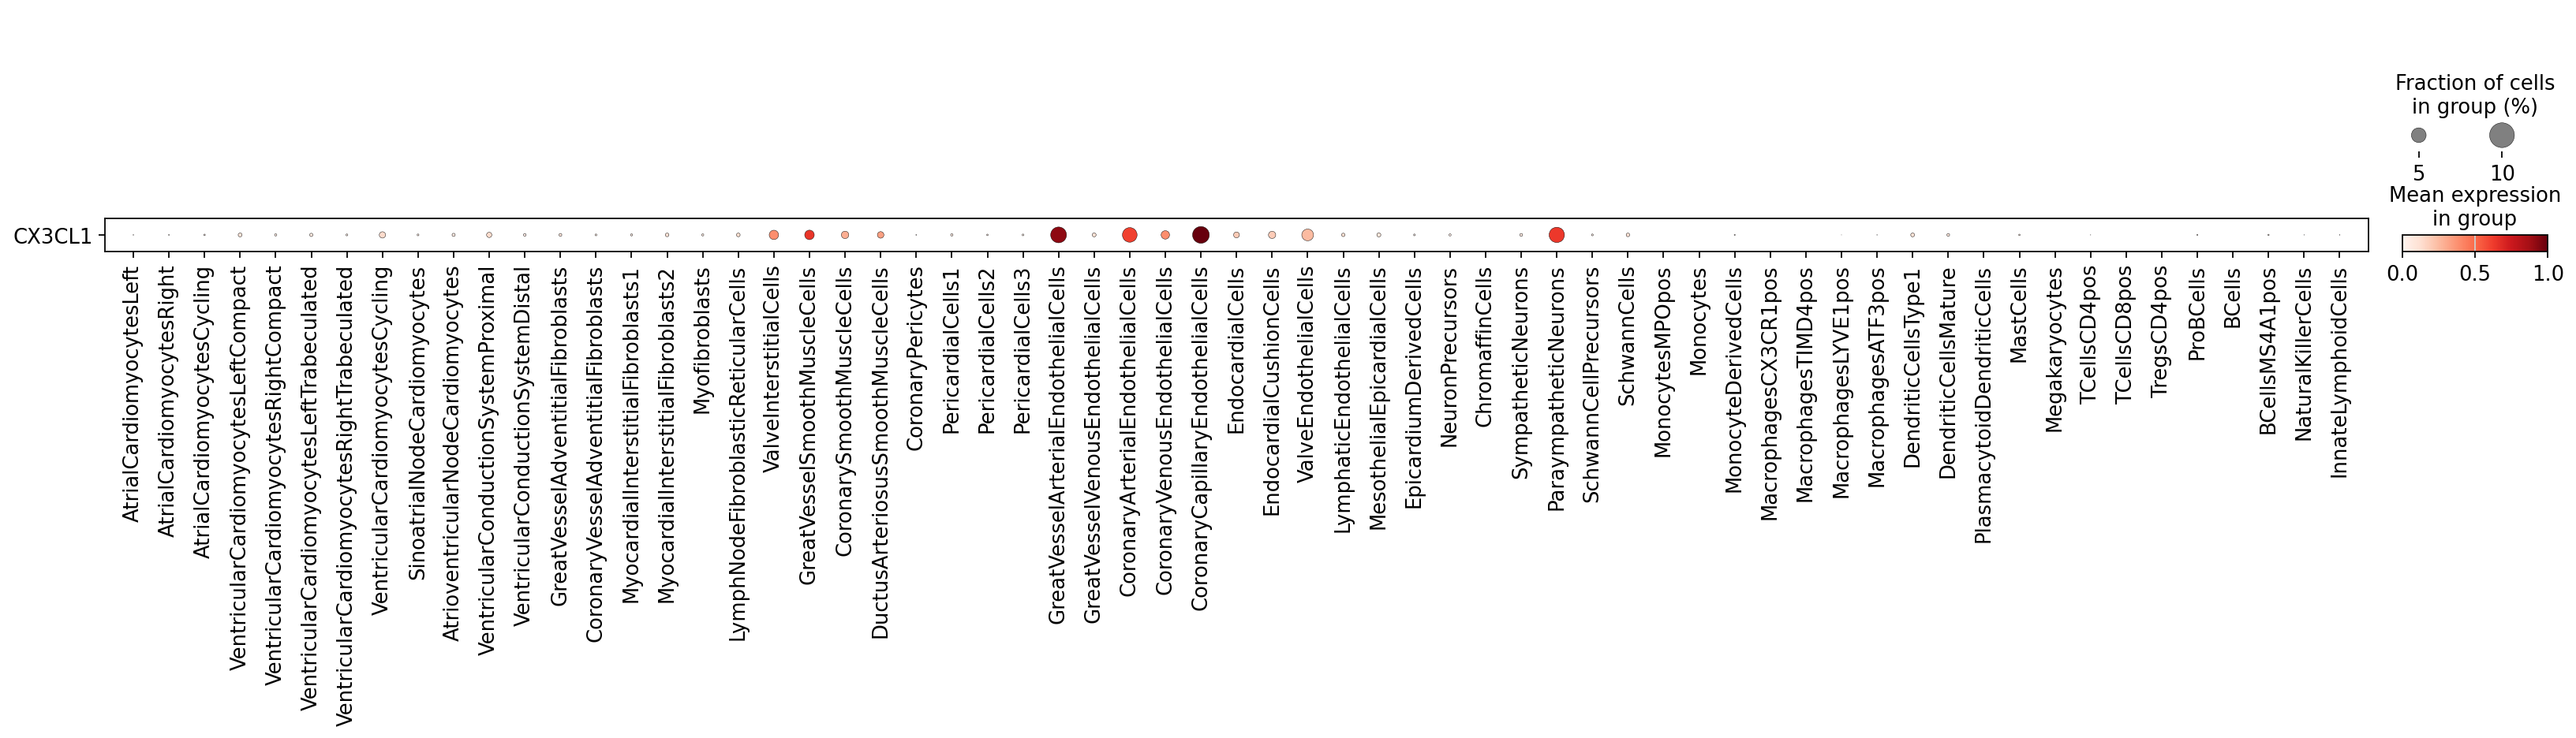

In [16]:
markers = ['CX3CL1']

sc.pl.dotplot(adata, 
             markers, 
              groupby='fine_grain',
              dendrogram=False,
              standard_scale="var",
              color_map="Reds",
              swap_axes=True,
              show=False
             )
plt.savefig(f'{figdir}/CX3CL1_expression_dotplot.pdf',bbox_inches="tight",dpi=300)
plt.show()

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


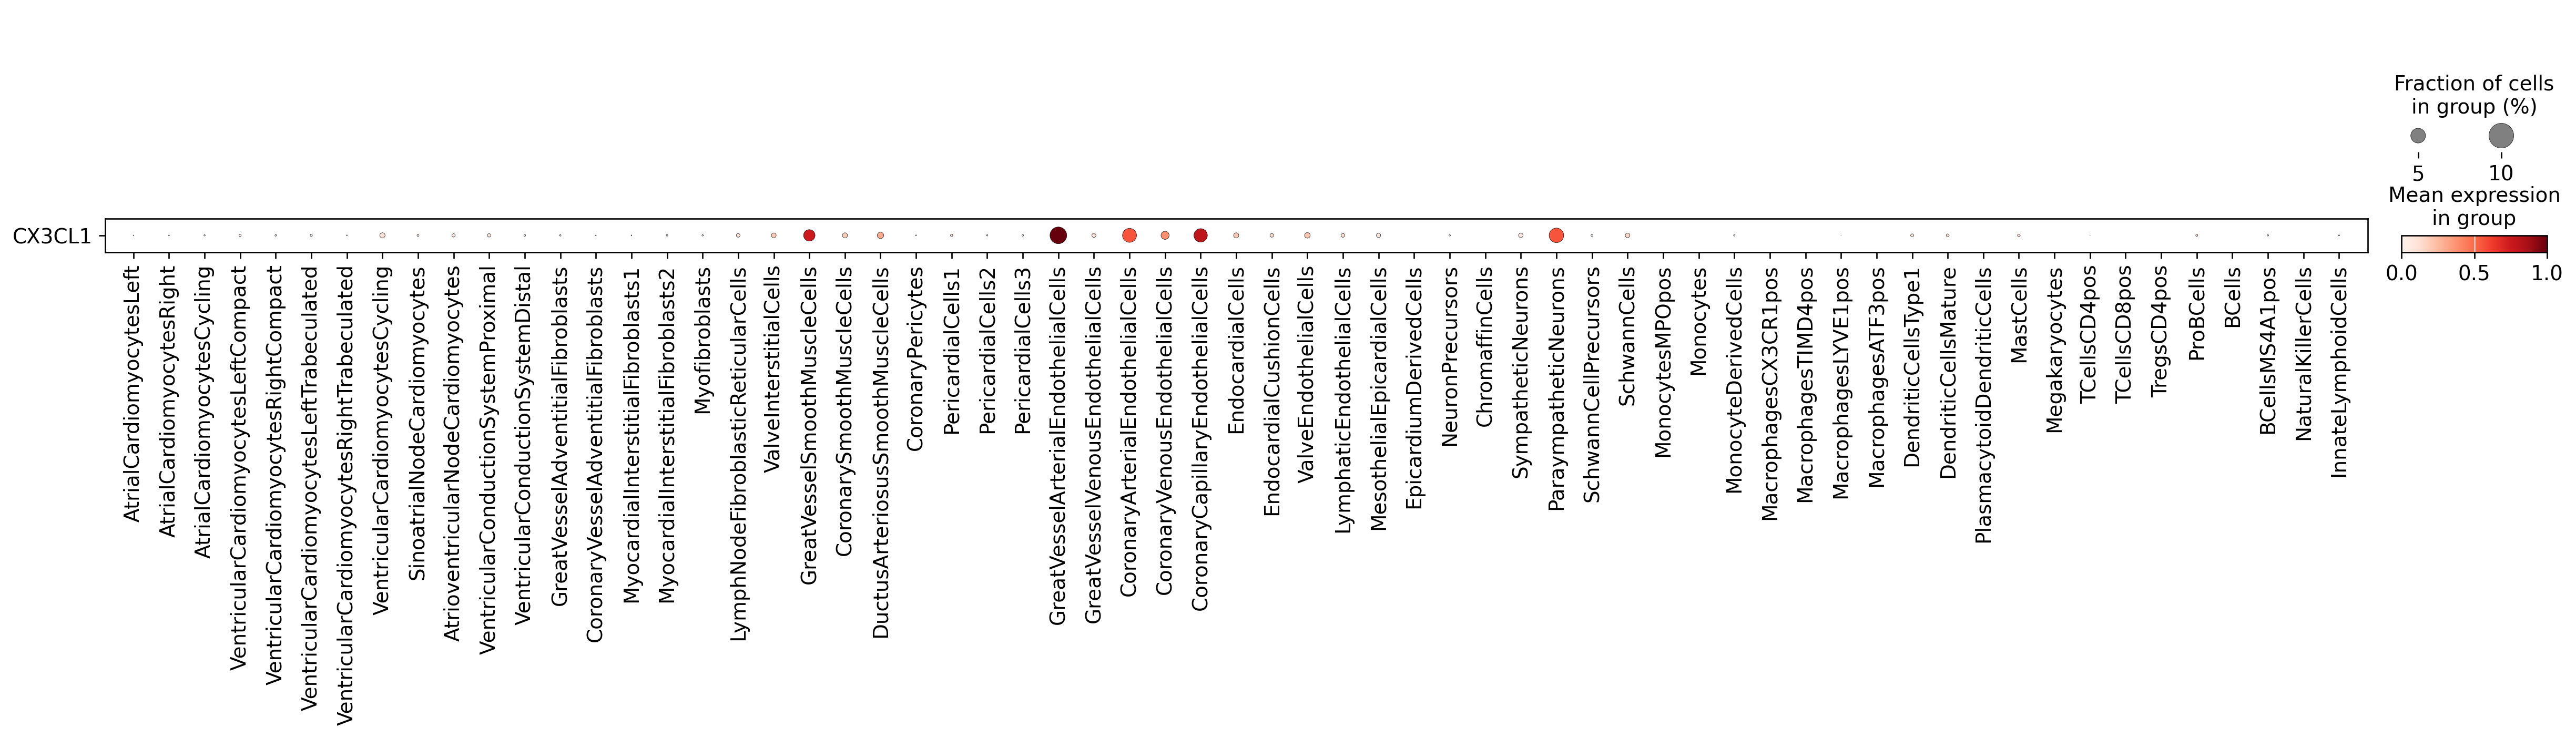

In [13]:
# only multiome
# just checking whether the result is similar
markers = ['CX3CL1']

sc.pl.dotplot(adata[adata.obs['kit_10x']=='Multiome-v1'], 
             markers, 
              groupby='fine_grain',
              dendrogram=False,
              standard_scale="var",
              color_map="Reds",
              swap_axes=True,
              # return_fig=True
             )